```
Name: Nasimul Arafin Rounok
ID# 21-45353-2
```




*   Mount your google drive.



In [17]:
# mount google drive if you are using Colab
# otherewise, leave it blank

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




*   Import necessary libraries.



In [12]:
# load/import all required library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
import seaborn as sns

from sklearn.model_selection import cross_val_score



•	**Task 1:** Read/Load the dataset file in your program. Use Pandas library to complete this task.

In [13]:
# write task-1 solution

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/salaries1.csv')
print(df.head)

<bound method NDFrame.head of        work_year experience_level employment_type                 job_title  \
0           2024               MI              FT            Data Scientist   
1           2024               MI              FT            Data Scientist   
2           2024               MI              CT            Data Scientist   
3           2024               MI              CT            Data Scientist   
4           2024               MI              FT      Data Science Manager   
...          ...              ...             ...                       ...   
16489       2020               SE              FT            Data Scientist   
16490       2021               MI              FT  Principal Data Scientist   
16491       2020               EN              FT            Data Scientist   
16492       2020               EN              CT     Business Data Analyst   
16493       2021               SE              FT      Data Science Manager   

        salary salary

•	**Task 2:** Apply appropriate data cleaning techniques to the dataset. In this step, replace bad data using proper methods and do not delete any record except duplicate records. Use Pandas library to complete this task.

In [14]:
# write task-2 solution

missing_values = df.isnull().sum()
print("Missing values:\n" , missing_values)

mean_salary = df['salary'].mean()
df['salary'] = df['salary'].fillna(mean_salary, inplace = True)

df.drop_duplicates(inplace = True)

print("Cleaned Dataset: \n",df.head())





Missing values:
 work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
Cleaned Dataset: 
    work_year experience_level employment_type             job_title salary  \
0       2024               MI              FT        Data Scientist   None   
1       2024               MI              FT        Data Scientist   None   
2       2024               MI              CT        Data Scientist   None   
3       2024               MI              CT        Data Scientist   None   
4       2024               MI              FT  Data Science Manager   None   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD         120000                 AU             0   
1             USD          70000                 AU             0   
2          

•	**Task 3:** Draw graphs to analyze the frequency distributions of the features. Use Matplotlib library to complete this task. Draw all the plots in a single figure so that all plots can be seen in one diagram (use subplot() function).

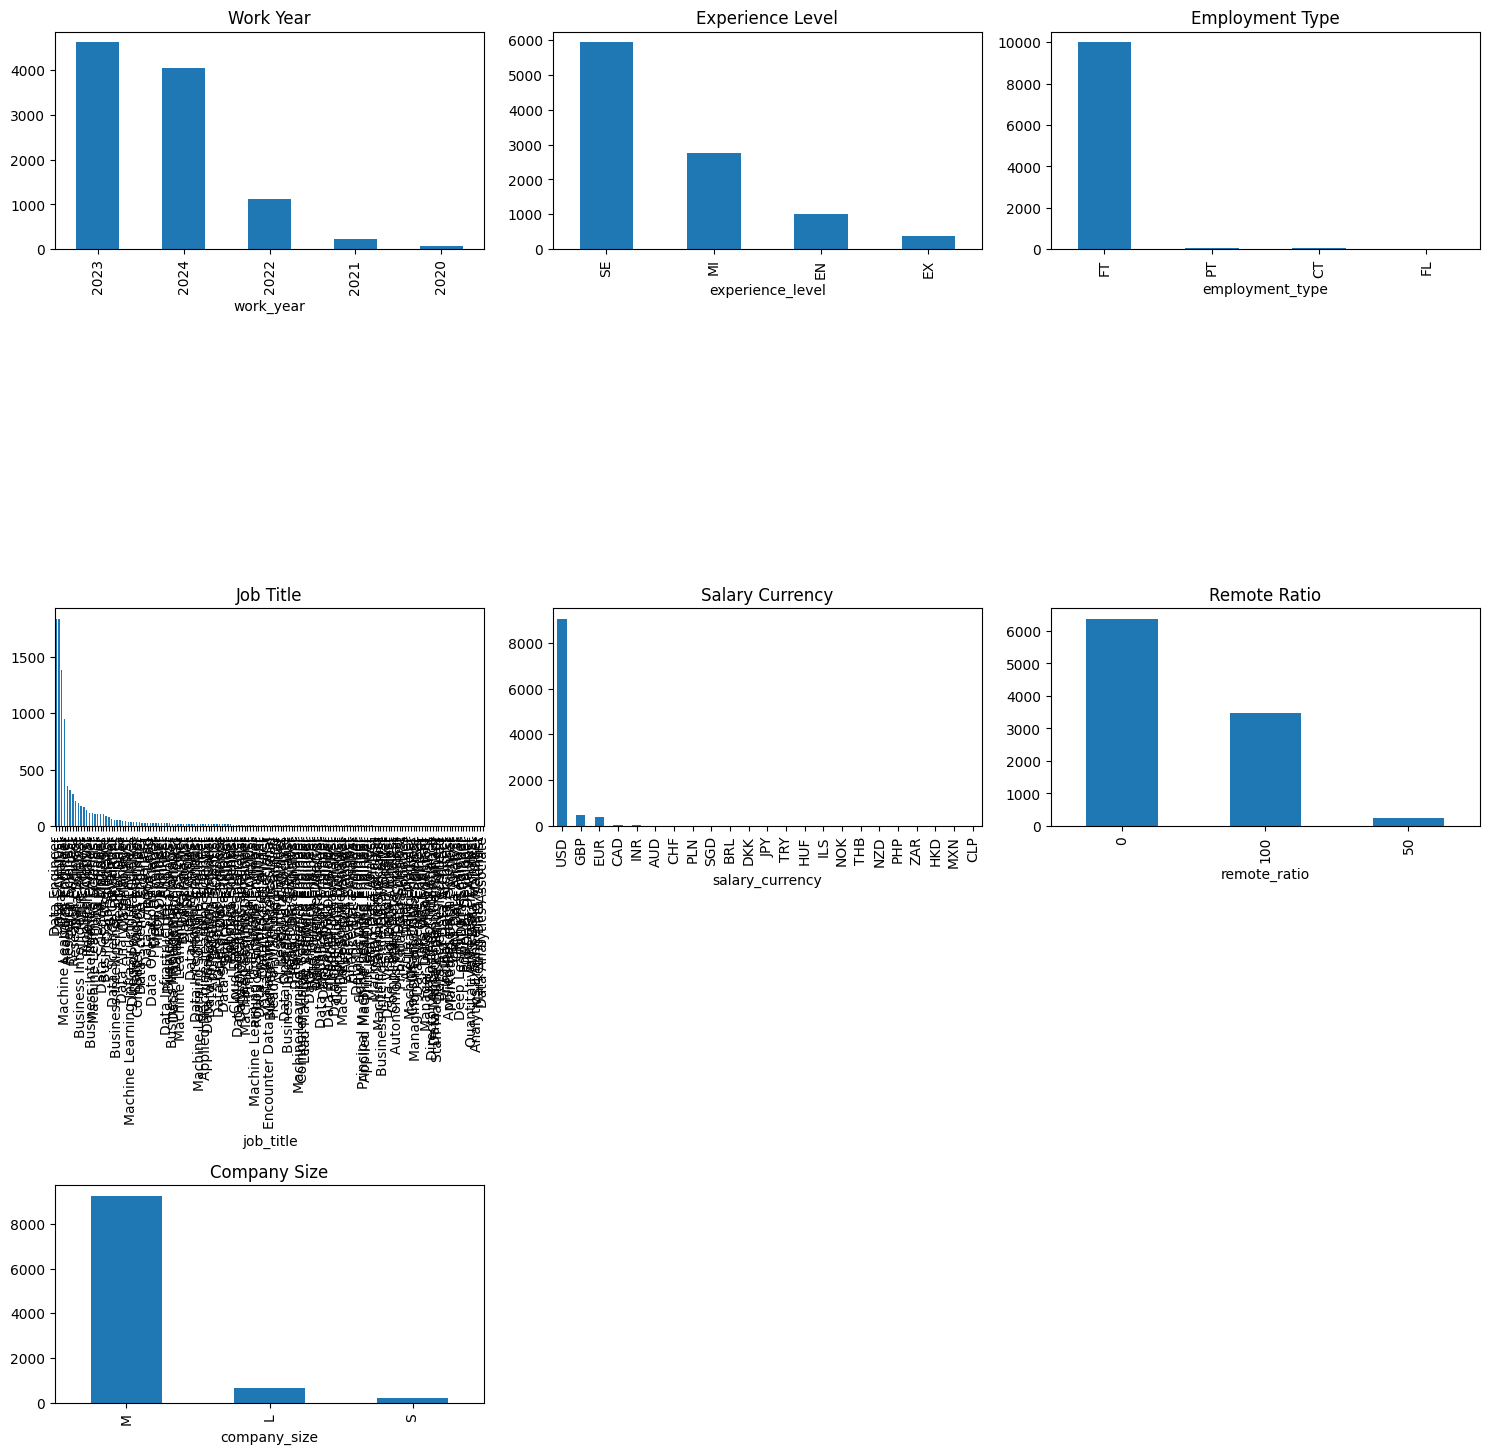

In [15]:
# write task-3 solution

plt.figure(figsize=(15, 20))

plt.subplot(4, 3, 1)
df['work_year'].value_counts().plot(kind='bar', title='Work Year')

plt.subplot(4, 3, 2)
df['experience_level'].value_counts().plot(kind='bar', title='Experience Level')

plt.subplot(4, 3, 3)
df['employment_type'].value_counts().plot(kind='bar', title='Employment Type')

plt.subplot(4, 3, 4)
df['job_title'].value_counts().plot(kind='bar', title='Job Title')

plt.subplot(4, 3, 5)
df['salary_currency'].value_counts().plot(kind='bar', title='Salary Currency')

plt.subplot(4, 3, 6)
df['remote_ratio'].value_counts().plot(kind='bar', title='Remote Ratio')

plt.subplot(4, 3, 7)
df['company_size'].value_counts().plot(kind='bar', title='Company Size')

plt.tight_layout()
plt.show()


•	**Task 4:** Draw graphs to illustrate if there is any relationship between target column to any other columns of the dataset. Use Matplotlib library to complete this task. Also use sublot() function to show all plots in one figure.

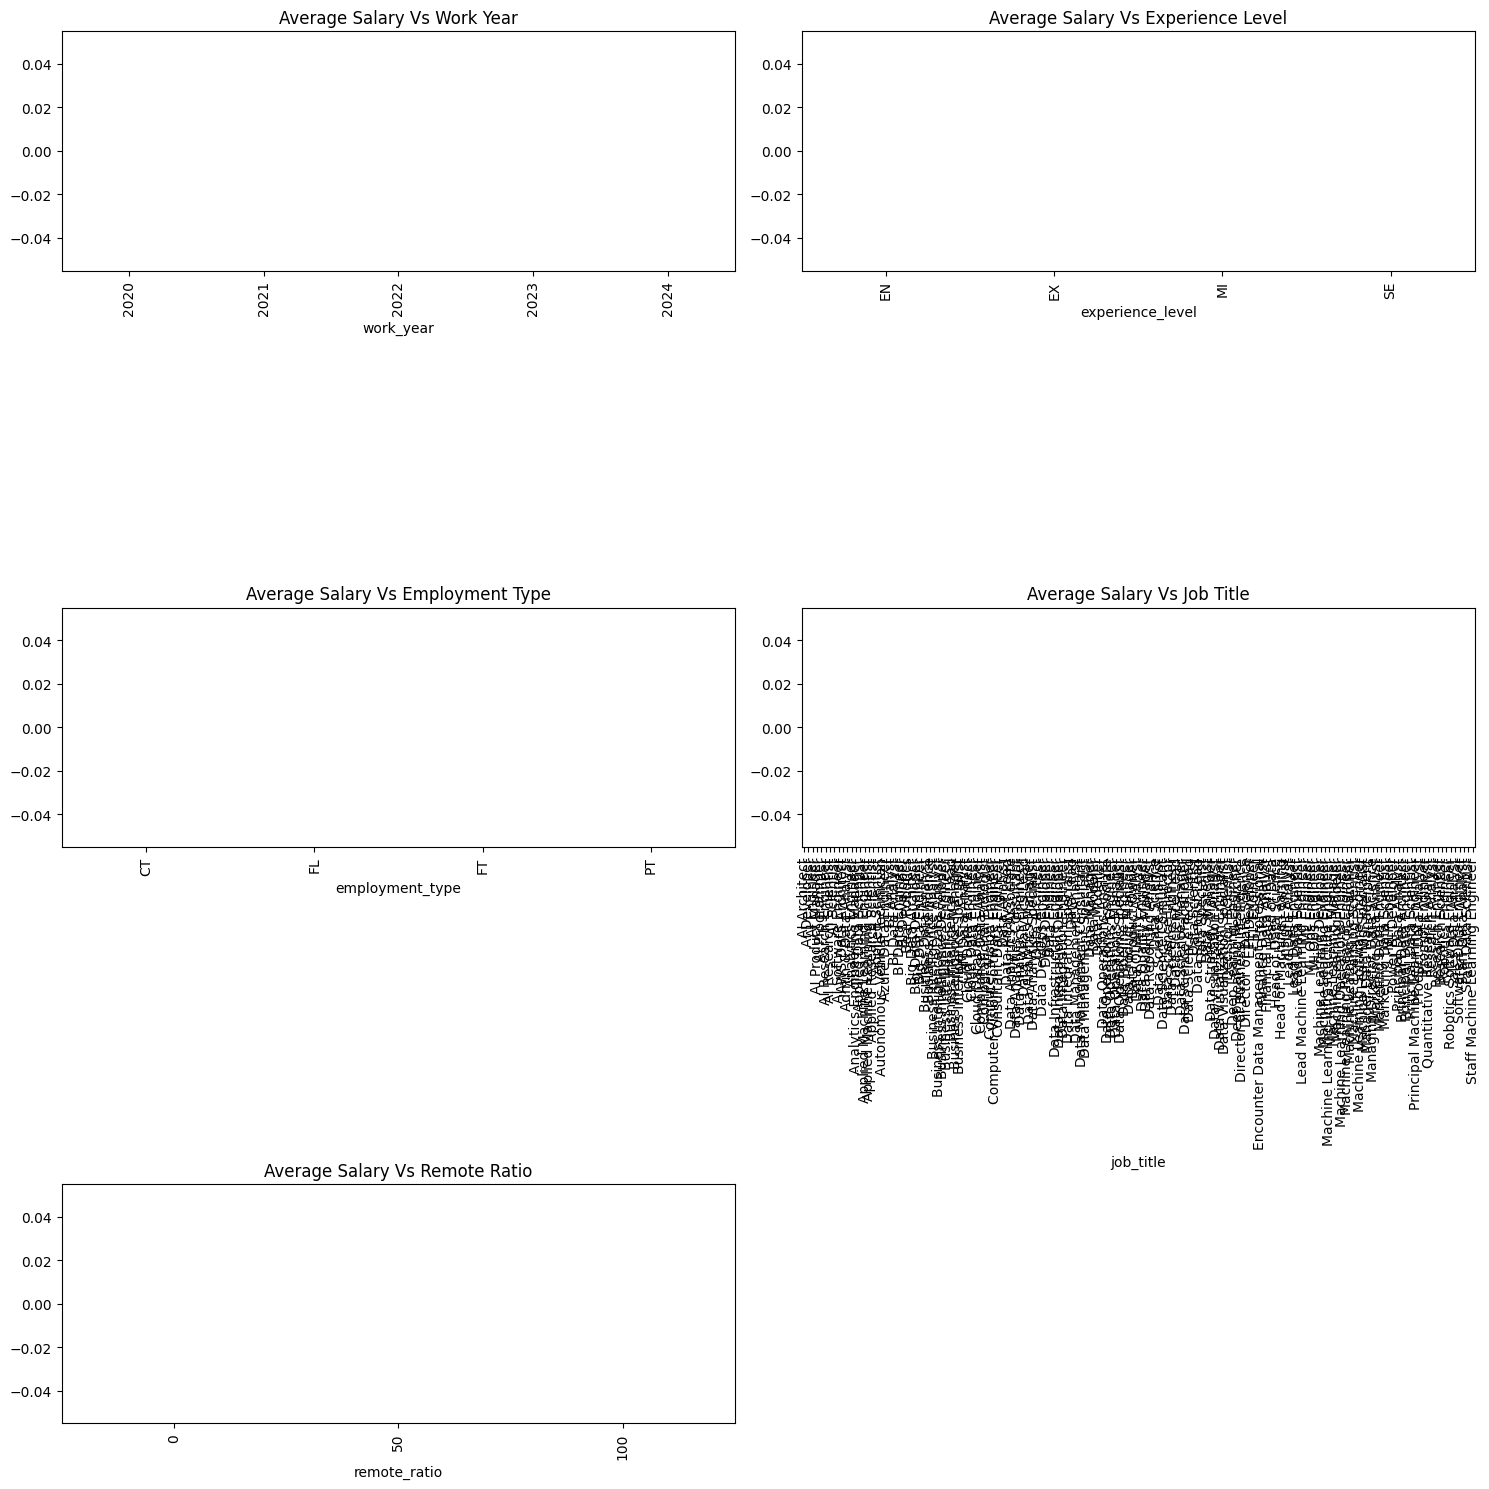

In [16]:
# write task-4 solution

plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
df.groupby('work_year')['salary'].mean().plot(kind='bar')
plt.title('Average Salary Vs Work Year')

plt.subplot(3, 2, 2)
df.groupby('experience_level')['salary'].mean().plot(kind='bar')
plt.title('Average Salary Vs Experience Level')

plt.subplot(3, 2, 3)
df.groupby('employment_type')['salary'].mean().plot(kind='bar')
plt.title('Average Salary Vs Employment Type')

plt.subplot(3, 2, 4)
df.groupby('job_title')['salary'].mean().plot(kind='bar')
plt.title('Average Salary Vs Job Title')

plt.subplot(3, 2, 5)
df.groupby('remote_ratio')['salary'].mean().plot(kind='bar')
plt.title('Average Salary Vs Remote Ratio')

plt.tight_layout()
plt.show()



•	**Task 5:** Perform scaling to the features of the dataset. Remember that you will need to apply data conversion before performing scaling if it is needed.

In [17]:
# write task-5 solution

X = df.drop(columns=["salary", "salary_currency", "salary_in_usd"])
y = df["salary_in_usd"]

numerical_columns = ['work_year', 'remote_ratio']
categorical_columns = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_scaled = pipeline.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled)

print(X_scaled_df.head())

                                                   0
0    (0, 0)\t0.9880617673304255\n  (0, 1)\t-0.753...
1    (0, 0)\t0.9880617673304255\n  (0, 1)\t-0.753...
2    (0, 0)\t0.9880617673304255\n  (0, 1)\t-0.753...
3    (0, 0)\t0.9880617673304255\n  (0, 1)\t-0.753...
4    (0, 0)\t0.9880617673304255\n  (0, 1)\t-0.753...


•	**Task 6:** Split your data into two parts: Training dataset and Testing dataset. You must use the function train_test_split() to complete this task and use value 321 as the value of the random_state parameter of this function.

In [18]:
# write task-6 solution

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=321)

print("Training set - X shape:", X_train.shape, ", y shape:", y_train.shape)
print("Testing set - X shape:", X_test.shape, ", y shape:", y_test.shape)

Training set - X shape: (8074, 333) , y shape: (8074,)
Testing set - X shape: (2019, 333) , y shape: (2019,)


•	**Task 7:** Apply Naïve Bayes Classifier to the dataset. Build (train) your prediction model in this step.

In [19]:
# write task-7 solution

naive_bayes_classifier = GaussianNB()

X_train_dense = X_train.toarray()

naive_bayes_classifier.fit(X_train_dense, y_train)

print("Naïve Bayes classifier model trained successfully.")

Naïve Bayes classifier model trained successfully.


•	**Taks 8:** Calculate the confusion matrix for your model. Interpret it in detail in the report.

In [21]:
# write task-8 solution
y_pred = naive_bayes_classifier.predict(X_test.toarray())

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
# plt.xlabel("Predicted Table")
# plt.ylabel("Actual table")
# plt.title("Confusion Matrix")
# plt.show()





Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


•	**Task 9:** Calculate the train and test accuracy of your model and compare them.

In [22]:
# write task-9 solution

train_accuracy = accuracy_score(y_train, naive_bayes_classifier.predict(X_train.toarray()))

test_accuracy = accuracy_score(y_test, y_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 0.14144166460242755
Test Accuracy: 0.0014858841010401188


•	**Task 10:** Show how 10-fold cross validation can be used to build a naïve bayes classifier and report the accuracy of this model.

In [23]:
# write task-10 solution

X_dense = X_scaled.toarray()

cv_scores = cross_val_score(naive_bayes_classifier, X_dense, y, cv=10)

print("Accuracy for each fold:", cv_scores)

print("Mean Accuracy:", cv_scores.mean())



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Accuracy for each fold: [0.0019802  0.         0.0039604  0.00396432 0.00198216 0.00297324
 0.00297324 0.00198216 0.0049554  0.00792864]
Mean Accuracy: 0.003269976155197284
